# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Exercise-4.1.-Determining-the-eigenvalues-of-a-symmetric-matrix" data-toc-modified-id="Exercise-4.1.-Determining-the-eigenvalues-of-a-symmetric-matrix-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Exercise 4.1. Determining the eigenvalues of a symmetric matrix</a></div><div class="lev1 toc-item"><a href="#Exercise-4.2.-Outer-product-matrices-have-all-nonnegative-eigenvalues" data-toc-modified-id="Exercise-4.2.-Outer-product-matrices-have-all-nonnegative-eigenvalues-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Exercise 4.2. Outer-product matrices have all nonnegative eigenvalues</a></div><div class="lev1 toc-item"><a href="#Exercise-4.3.-An-alternative-way-to-check-the-second-order-definition-of-convexity" data-toc-modified-id="Exercise-4.3.-An-alternative-way-to-check-the-second-order-definition-of-convexity-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Exercise 4.3. An alternative way to check the second-order definition of convexity</a></div><div class="lev1 toc-item"><a href="#Exercise-4.4.-Newton's-method-I" data-toc-modified-id="Exercise-4.4.-Newton's-method-I-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Exercise 4.4. Newton's method I</a></div><div class="lev1 toc-item"><a href="#Exercise-4.5.-Newton's-method-II" data-toc-modified-id="Exercise-4.5.-Newton's-method-II-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Exercise 4.5. Newton's method II</a></div><div class="lev1 toc-item"><a href="#Exercise-4.6.-Finding-square-roots" data-toc-modified-id="Exercise-4.6.-Finding-square-roots-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Exercise 4.6. Finding square roots</a></div><div class="lev1 toc-item"><a href="#Exercise-4.7.-Nonconvex-minimization-using-Newton’s-method" data-toc-modified-id="Exercise-4.7.-Nonconvex-minimization-using-Newton’s-method-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Exercise 4.7. Nonconvex minimization using Newton’s method</a></div><div class="lev1 toc-item"><a href="#Exericse-4.8.-Newtonian-descent" data-toc-modified-id="Exericse-4.8.-Newtonian-descent-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Exericse 4.8. Newtonian descent</a></div><div class="lev1 toc-item"><a href="#Exercise-4.9.-Newton’s-method-as-a-self-adjusting-gradient-descent-method" data-toc-modified-id="Exercise-4.9.-Newton’s-method-as-a-self-adjusting-gradient-descent-method-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Exercise 4.9. Newton’s method as a self-adjusting gradient descent method</a></div><div class="lev1 toc-item"><a href="#Exercise-4.10.-The-Broyden–Fletcher–Goldfarb–Shanno-(BFGS)-method" data-toc-modified-id="Exercise-4.10.-The-Broyden–Fletcher–Goldfarb–Shanno-(BFGS)-method-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Exercise 4.10. The Broyden–Fletcher–Goldfarb–Shanno (BFGS) method</a></div>

In [1]:
# import basic librariees and autograd wrapped numpy
import sys
sys.path.append('../')
import autograd.numpy as np
import matplotlib.pyplot as plt

# imports from custom library
from mlrefined_libraries import basics_library as baslib
from mlrefined_libraries import calculus_library as calib
from mlrefined_libraries import math_optimization_library as optlib

# import custom plotting tools
static_plotter = optlib.static_plotter.Visualizer();
anime_plotter = optlib.animation_plotter.Visualizer();

# this is needed to compensate for matplotlib notebook's tendancy to blow up images when plotted inline
%matplotlib notebook
from matplotlib import rcParams
rcParams['figure.autolayout'] = True

# Exercise 4.1. Determining the eigenvalues of a symmetric matrix


**a)**  Suppose first that all of the eigenvalues $d_{n}\geq0$. Then the
curvature function is $\psi\left(\mathbf{z}\right)=\mathbf{z}^{T}\mathbf{C}\mathbf{z}=\mathbf{z}^{T}\left(\stackrel[n=1]{N}{\sum}\mathbf{e}_{n}\mathbf{e}_{n}^{T}d_{n}\right)\mathbf{z}=\underset{n=1}{\overset{N}{\sum}}\left(\mathbf{e}_{n}^{T}\mathbf{z}\right)^{2}d_{n}$.
Since each $\left(\mathbf{e}_{n}^{T}\mathbf{z}\right)^{2}\geq0$ together
with the assumption that $d_{n}\geq0$, we have that $\psi\left(\mathbf{z}\right)\geq0$
and therefore that $\mathbf{C}$ is positive semidfinite.

**b)** Now suppose that $\mathbf{C}$ is positive semidefinite. Then we
know that the corresponding curvature function $\psi\left(\mathbf{z}\right)=\mathbf{z}^{T}\mathbf{C}\mathbf{z}\geq0$,
and using the eigenfactorization of $\mathbf{C}$ this is equivalently
$\psi\left(\mathbf{z}\right)=\mathbf{z}^{T}\mathbf{C}\mathbf{z}=\mathbf{z}^{T}\left(\stackrel[n=1]{N}{\sum}\mathbf{e}_{n}\mathbf{e}_{n}^{T}d_{n}\right)\mathbf{z}=\underset{n=1}{\overset{N}{\sum}}\left(\mathbf{e}_{n}^{T}\mathbf{z}\right)^{2}d_{n}\geq0$
. Since this sum is \emph{always} nonnegative, so too then must be
the eigenvalues $d_{n}\geq0$ for all $n=1...N$. If this were not
the case, say one $d_{j}<0$, then since the eigenvectors are orthogonal
by setting $\mathbf{z}=\mathbf{e}_{j}$ the curavture function reduces
to $\psi\left(\mathbf{z}\right)=\underset{n=1}{\overset{N}{\sum}}\left(\mathbf{e}_{n}^{T}\mathbf{e}_{j}\right)^{2}d_{n}=d_{j}<0$
which would contradict our assumption that $\mathbf{C}$ was positive
semidefinite.

**c)**  $\mathbf{C}=\left[\begin{array}{cc}
1 & 1\\
1 & 1
\end{array}\right]$ has two eigenvalues, $d_{1}=0$ and $d_{2}=2$, both nonnegative.
Therefore $\mathbf{C}$ is positive semidefinite and $g$ is convex.

**d)** Let $\psi\left(\mathbf{z}\right)$ be the curvature function of
the sum\noindent 
\begin{equation}
\mathbf{C}+\lambda\mathbf{I}_{N\times N}=\mathbf{E}\mathbf{D}\mathbf{E}^{T}+\lambda\mathbf{E}\mathbf{E}^{T}=\underset{n=1}{\overset{N}{\sum}}\mathbf{e}_{n}\mathbf{e}_{n}^{T}d_{n}+\underset{n=1}{\overset{N}{\sum}}\mathbf{e}_{n}\mathbf{e}_{n}^{T}\lambda=\underset{n=1}{\overset{N}{\sum}}\mathbf{e}_{n}\mathbf{e}_{n}^{T}\left(d_{n}+\lambda\right).
\end{equation}

Therefore we have $\psi\left(\mathbf{z}\right)=\mathbf{z}^{T}\left(\underset{n=1}{\overset{N}{\sum}}\mathbf{e}_{n}\mathbf{e}_{n}^{T}\left(d_{n}+\lambda\right)\right)\mathbf{z}=\underset{n=1}{\overset{N}{\sum}}\left(\mathbf{e}_{n}^{T}\mathbf{z}\right)^{2}\left(d_{n}+\lambda\right)$.
Now, since each $\left(\mathbf{e}_{n}^{T}\mathbf{z}\right)^{2}\geq0$
if we set $\lambda$ large enough so that $d_{n}+\lambda\geq0$ for
all $n$ then so too must the sum be nonnegative. Hence by setting
$\lambda$ to the absolute value of the smallest eigenvalue of $\mathbf{C}$,
the sum $\mathbf{C}+\lambda\mathbf{I}_{N\times N}$ can be made semipositive
definite.

# Exercise 4.2. Outer-product matrices have all nonnegative eigenvalues

**a)** The curvature function for $\mathbf{x}\mathbf{x}^{T}$ is given
by $\psi\left(\mathbf{z}\right)=\mathbf{z}^{T}\mathbf{xx}^{T}\mathbf{z}=\left(\mathbf{x}^{T}\mathbf{z}\right)^{2}\geq0$,
which is always nonnegative. Therefore all eignevalues of $\mathbf{x}\mathbf{x}^{T}$
must be nonnegative. 

**b)** The curvature function for $\underset{p=1}{\overset{P}{\sum}}\delta_{p}\mathbf{x}_{p}\mathbf{x}_{p}^{T}$
is given by\noindent 
\begin{equation}
\psi\left(\mathbf{z}\right)=\mathbf{z}^{T}\left(\underset{p=1}{\overset{P}{\sum}}\delta_{p}\mathbf{x}_{p}\mathbf{x}_{p}^{T}\right)\mathbf{z}=\underset{p=1}{\overset{P}{\sum}}\delta_{p}\left(\mathbf{x}_{p}^{T}\mathbf{z}\right)^{2},
\end{equation}

which is always nonnegative if $\delta_{p}\geq0$ for all $p$.

**c)** In part b), we showed that $\underset{p=1}{\overset{P}{\sum}}\delta_{p}\mathbf{x}_{p}\mathbf{x}_{p}^{T}$
has all nonnegative eignevalues. Now note that adding $\lambda\mathbf{I}_{N\times N}$
to $\underset{p=1}{\overset{P}{\sum}}\delta_{p}\mathbf{x}_{p}\mathbf{x}_{p}^{T}$
shifts each of its eigenvalues to the right by $\lambda$. Therefore
all eignevalues of the sum $\underset{p=1}{\overset{P}{\sum}}\delta_{p}\mathbf{x}_{p}\mathbf{x}_{p}^{T}+\lambda\mathbf{I}_{N\times N}$
are greater than or equal to $\lambda>0$, and hence positive. 

# Exercise 4.3. An alternative way to check the second-order definition of convexity

**a)** This is the straightforward result of Exercise 2.9.

**b)** $\nabla^{2}g\left(\mathbf{w}\right)=\frac{1}{2}\left(\mathbf{C}^{T}+\mathbf{C}\right)=\mathbf{C}$.
Therefore regardless of the values for $\mathbf{r}$ and $d$, $g$
always defines a convex function as long as the eigenvalues of $\mathbf{C}$
are all nonnegative. 

**c)** The Hessian of $g\left(\mathbf{w}\right)$ can be calculated as
$\nabla^{2}g\left(\mathbf{w}\right)=4\pi^{2}\mbox{cos}\left(2\pi\mathbf{w}^{T}\mathbf{w}\right)\mathbf{w}\mathbf{w}^{T}$,
with the curvature function given as $\psi\left(\mathbf{z}\right)=\mathbf{z}^{T}\left(\nabla^{2}g\left(\mathbf{w}\right)\right)\mathbf{z}=\mathbf{z}^{T}\left(4\pi^{2}\mbox{cos}\left(2\pi\mathbf{w}^{T}\mathbf{w}\right)\mathbf{ww}^{T}\right)\mathbf{z}=4\pi^{2}\mbox{cos}\left(2\pi\mathbf{w}^{T}\mathbf{w}\right)\left(\mathbf{w}^{T}\mathbf{z}\right)^{2}$.
Note that when $\mbox{cos}\left(2\pi\mathbf{w}^{T}\mathbf{w}\right)<0$,
e.g., with $\mathbf{w}=\left[\begin{array}{cc}
\frac{1}{2} & 0\end{array}\right]^{T}$ , $\psi\left(\mathbf{z}\right)$ can take on negative values and
therefore $g$ cannot be convex. 

# Exercise 4.4. Newton's method I

In [40]:
# using an automatic differentiator - like the one imported via the statement below - makes coding up gradient descent a breeze
from autograd import grad 
from autograd import hessian

# newtons method function - inputs: g (input function), max_its (maximum number of iterations), w (initialization)
def newtons_method(g,max_its,w,**kwargs):
    # compute gradient module using autograd
    gradient = grad(g)
    hess = hessian(g)
    
    # set numericxal stability parameter / regularization parameter
    epsilon = 10**(-10)
    if 'epsilon' in kwargs:
        epsilon = kwargs['epsilon']

    # run the newtons method loop
    weight_history = [w]           # container for weight history
    cost_history = [g(w)]          # container for corresponding cost function history
    for k in range(max_its):
        # evaluate the gradient and hessian
        grad_eval = gradient(w)
        hess_eval = hess(w)

        # reshape hessian to square matrix for numpy linalg functionality
        hess_eval.shape = (int((np.size(hess_eval))**(0.5)),int((np.size(hess_eval))**(0.5)))
        
        # solve second order system system for weight update
        A = hess_eval + epsilon*np.eye(w.size)
        b = grad_eval
        w = np.linalg.solve(A,np.dot(A,w) - b)
        
        # record weight and cost
        weight_history.append(w)
        cost_history.append(g(w))
    return weight_history,cost_history

In the next Python cell we animate the process of performing Newton's method to minimize the function

\begin{equation}
g(w) = \frac{1}{50}\left(w^4 + w^2 + 10w \right) + 0.5
\end{equation}

beginning at the point $w = 2.5$ marked as a magenta dot (and corresponding evaluation of the function marked as magenta X). 

Moving the slider from left to right animates each step of the process in stages - the second order approximation is shown in light blue, then its minimum is marked with a magenta dot on the input space, along with the evaluation on the quadratic and function $g$ marked as a magenta and blue X respectively.  As Newton's method continues each step is colored from green - when the method begins - to red as it reaches the maximum number of pre-defined iterations (set here to 5).


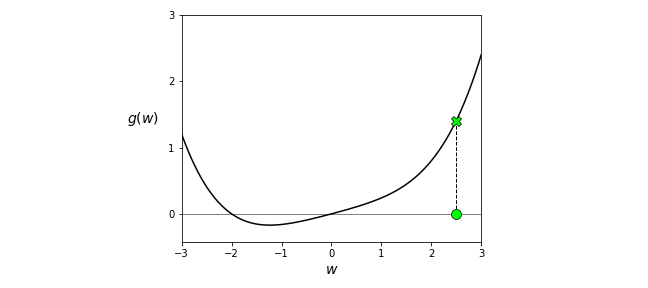
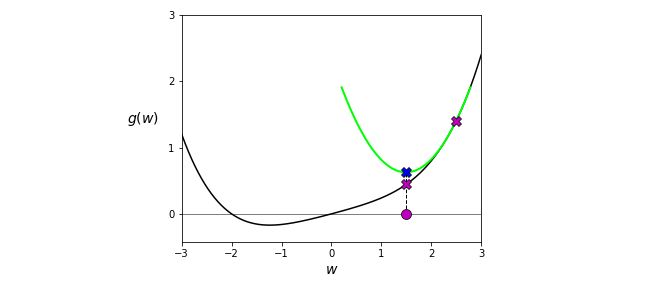
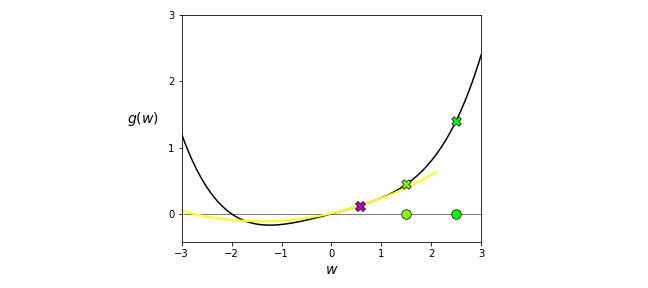
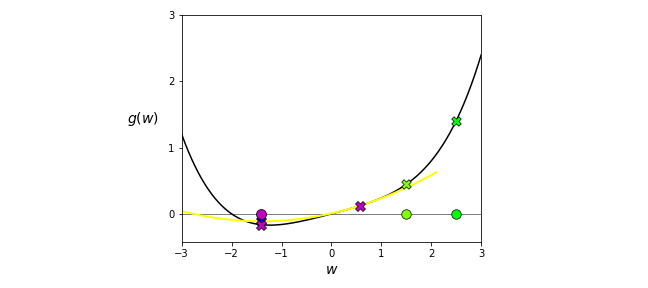
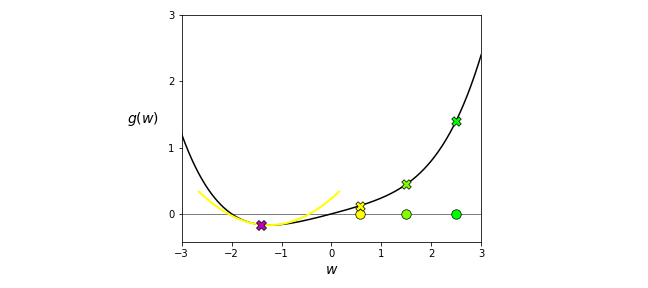
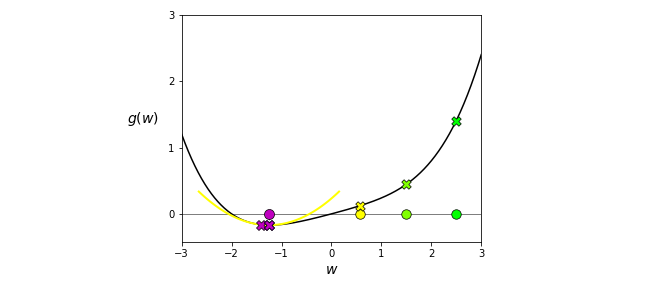
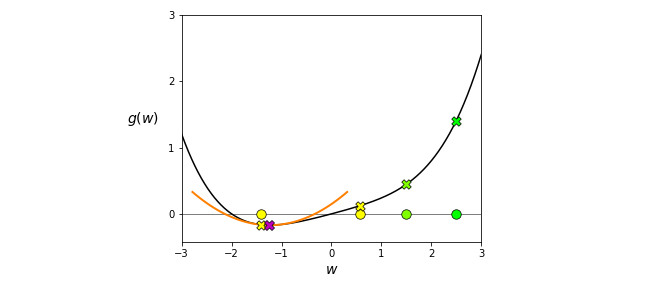
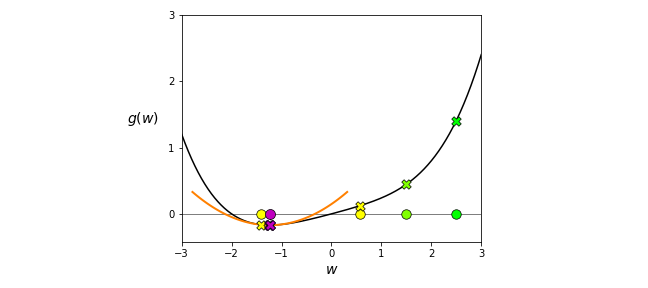
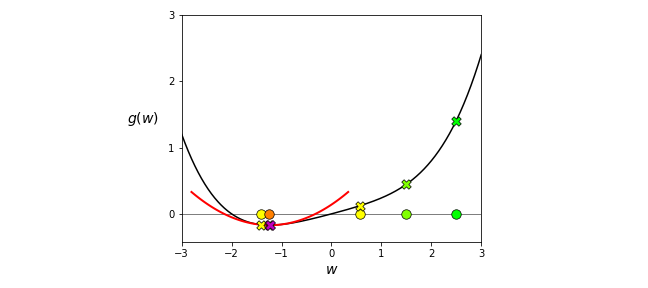
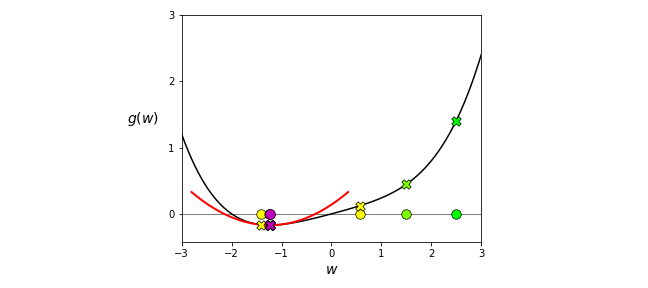
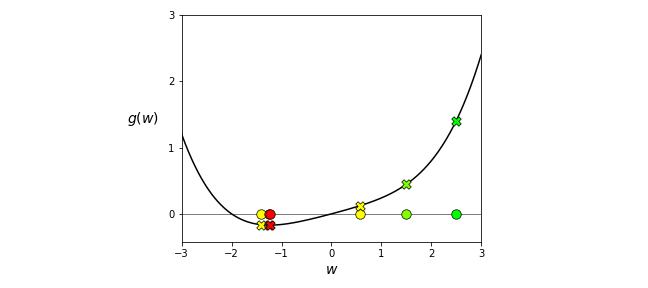

In [4]:
# This code cell will not be shown in the HTML version of this notebook
# what function should we play with?  Defined in the next line.
g = lambda w: 1/float(50)*(w**4 + w**2 + 10*w)   # try other functions too!  Like g = lambda w: np.cos(2*w) , g = lambda w: np.sin(5*w) + 0.1*w**2, g = lambda w: np.cos(5*w)*np.sin(w)

# run gradient descent 
w = np.array([2.5]); max_its = 5;
weight_history,cost_history = newtons_method(g,max_its,w)

# animate the process
anime_plotter.newtons_method(g,weight_history)

# Exercise 4.5. Newton's method II

**a)** Setting the gradient of $g\left(\mathbf{w}\right)=\mbox{log}\left(1+e^{\mathbf{w}^{T}\mathbf{w}}\right)$
to zero, using the chain rule, gives\noindent
\begin{equation}
\nabla g\left(\mathbf{w}\right)=\frac{2e^{\mathbf{w}^{T}\mathbf{w}}}{1+e^{\mathbf{w}^{T}\mathbf{w}}}\mathbf{w}=\mathbf{0}_{N\times1}.
\end{equation}

Since the scalar weight $\frac{2e^{\mathbf{w}^{T}\mathbf{w}}}{1+e^{\mathbf{w}^{T}\mathbf{w}}}\geq1$
the only way the equality can occur is when $\mathbf{w}=\mathbf{0}_{N\times1}$.

**b)** The Hessian of $g$, using the chain rule and product rule, may
be calculated as\noindent

\begin{equation}
\nabla^{2}g\left(\mathbf{w}\right)=\frac{4e^{\mathbf{w}^{T}\mathbf{w}}}{\left(1+e^{\mathbf{w}^{T}\mathbf{w}}\right)^{2}}\mathbf{w}\mathbf{w}^{T}+\frac{2e^{\mathbf{w}^{T}\mathbf{w}}}{1+e^{\mathbf{w}^{T}\mathbf{w}}}\mathbf{I}_{N\times N}.
\end{equation}

Fixing $\mathbf{w}$ for the moment, for any $N$ length column vector
$\mathbf{z}$ we have that (where $\mathbf{I}_{N\times N}$ is a $N\times N$
identity)\noindent

\begin{equation}
\mathbf{z}^{T}\nabla^{2}g\left(\mathbf{w}\right)\mathbf{z}=\mathbf{z}^{T}\left(\frac{4e^{\mathbf{w}^{T}\mathbf{w}}}{\left(1+e^{\mathbf{w}^{T}\mathbf{w}}\right)^{2}}\mathbf{w}\mathbf{w}^{T}+\frac{2e^{\mathbf{w}^{T}\mathbf{w}}}{1+e^{\mathbf{w}^{T}\mathbf{w}}}\mathbf{I}_{N\times N}\right)\mathbf{z}
\end{equation}

\begin{equation}
=\mathbf{z}^{T}\nabla^{2}g\left(\mathbf{w}\right)\mathbf{z}=\mathbf{z}^{T}\frac{4e^{\mathbf{w}^{T}\mathbf{w}}}{\left(1+e^{\mathbf{w}^{T}\mathbf{w}}\right)^{2}}\mathbf{w}\mathbf{w}^{T}\mathbf{z}+\mathbf{z}^{T}\frac{2e^{\mathbf{w}^{T}\mathbf{w}}}{1+e^{\mathbf{w}^{T}\mathbf{w}}}\mathbf{I}_{N\times N}\mathbf{z}
\end{equation}

\begin{equation}
=\frac{4e^{\mathbf{w}^{T}\mathbf{w}}}{\left(1+e^{\mathbf{w}^{T}\mathbf{w}}\right)^{2}}\mathbf{z}^{T}\mathbf{w}\mathbf{w}^{T}\mathbf{z}+\frac{2e^{\mathbf{w}^{T}\mathbf{w}}}{1+e^{\mathbf{w}^{T}\mathbf{w}}}\mathbf{z}^{T}\mathbf{z}
\end{equation}

\begin{equation}
=\frac{4e^{\mathbf{w}^{T}\mathbf{w}}}{\left(1+e^{\mathbf{w}^{T}\mathbf{w}}\right)^{2}}\left(\mathbf{z}^{T}\mathbf{w}\right)^{2}+\frac{2e^{\mathbf{w}^{T}\mathbf{w}}}{1+e^{\mathbf{w}^{T}\mathbf{w}}}\left\Vert \mathbf{z}\right\Vert _{2}^{2}.
\end{equation}

Since each component of this expression is nonnegative regardless
of the $\mathbf{z}$ chosen, i.e., $\frac{4e^{\mathbf{w}^{T}\mathbf{w}}}{\left(1+e^{\mathbf{w}^{T}\mathbf{w}}\right)^{2}}\geq0$,
$\left(\mathbf{z}^{T}\mathbf{w}\right)^{2}\geq0$, etc., so too is
the sum always nonnegative, regardless of the $\mathbf{z}$ chosen.
However this also holds regardless of which $\mathbf{w}$ is chosen, hence we have that 

\begin{equation}
\mathbf{z}^{T}\nabla^{2}g\left(\mathbf{w}\right)\mathbf{z}\geq0,
\end{equation}

for all $\mathbf{w}$ and $\mathbf{z}$, and therefore (by the second
order definition of convexity) $g$ is indeed convex. 


**c)**  Our first run is shown below.

In [33]:
g = lambda w: np.log(1 + np.exp(np.dot(w.T,w)))   # try other functions too!  Like g = lambda w: np.cos(2*w) , g = lambda w: np.sin(5*w) + 0.1*w**2, g = lambda w: np.cos(5*w)*np.sin(w)
w = np.ones((2,)); max_its = 10;
weight_history,cost_history = newtons_method(g,max_its,w)

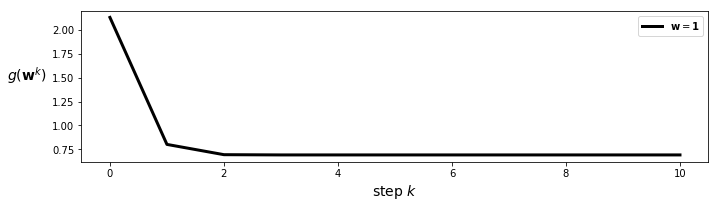

In [34]:
# plot the cost function history for a given run
static_plotter.plot_cost_histories([cost_history],start = 0,points = False,labels = [r'$\mathbf{w}=\mathbf{1}$'])

**d)**  Our first and second run are shown below.

In [45]:
w = np.ones((2,)); max_its = 2;
weight_history,cost_history = newtons_method(g,max_its,w)

w = 4*np.ones((2,)); max_its = 2;
weight_history_2,cost_history_2 = newtons_method(g,max_its,w)

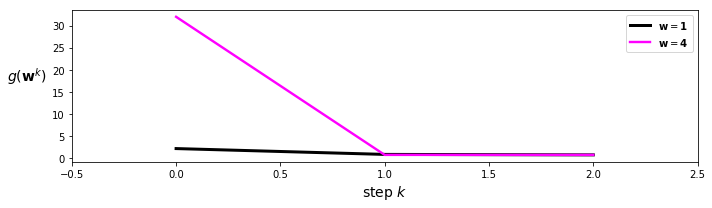

In [46]:
# plot the cost function history for a given run
static_plotter.plot_cost_histories([cost_history,cost_history_2],start = 0,points = False,labels = [r'$\mathbf{w}=\mathbf{1}$',r'$\mathbf{w}=\mathbf{4}$'])

We can see that the *larger* initialization leads to faster convergence by printing out the first few cost function history values.

In [47]:
print(cost_history)
print(cost_history_2)

[2.1269280110429727, 0.8028127806155011, 0.6957337248004978]
[32.000000000000014, 0.6931471805599453, 0.6931471805599453]


# Exercise 4.6. Finding square roots

From the description of the problem we want to find the zero of

\begin{equation}
g(w) = w^2 - 999
\end{equation}

To use our generic Newton's method module we need to treat this as the derivative function - i.e., as $g^{\prime}(w)$, meaning we wish to apply Newton's method to the *antiderivative* of the function above

\begin{equation}
f(w) = \frac{1}{3}w^3 - 999w + C
\end{equation}

In [48]:
# define function
f = lambda w: 1/float(3)*w**3 - 999*w
g = lambda w: w**2 - 999

In [49]:
w_init = np.random.randn(1)
max_its = 10
epsilon = 1
weight_history,cost_history = newtons_method(f,max_its,w_init,epsilon=epsilon)

Lets examine our output weight history - the final entry of which should be an approximate square root value.

In [50]:
print (weight_history[-1])

[31.61851076]


And indeed it is!

Notice if you plot the cost function history corresponding to these weights that we do not have descent at each and every step.  That is because the function we are actually minimizing is non-convex.

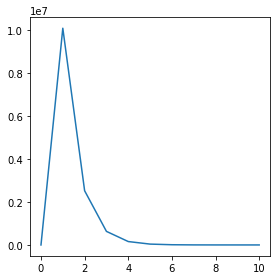

In [51]:
# scatter plot the input data
fig, ax = plt.subplots(1, 1, figsize=(4,4))
cost_history = [g(w) for w in weight_history]
ax.plot(cost_history)
plt.show()

# Exercise 4.7. Nonconvex minimization using Newton’s method

In [52]:
g = lambda w: np.cos(w)
w_init = np.array([0.1]).flatten()
max_its = 10
epsilon = 1
weight_history,cost_history = newtons_method(g,max_its,w_init,epsilon=epsilon)

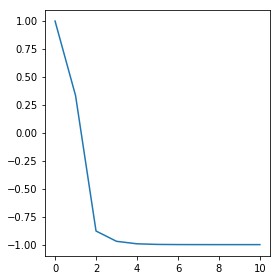

In [53]:
# scatter plot the input data
fig, ax = plt.subplots(1, 1, figsize=(4,4))
cost_history = [g(w) for w in weight_history]
ax.plot(cost_history)
plt.show()

# Exericse 4.8. Newtonian descent

**a)**   With $\epsilon$ set large enough so that the regularized second order quadratic is convex, to verify that the above step produces descent (for some value of $\alpha$) we can follow an argument very similar to the one given for gradient descent and backtracking linesearch / conservative steplength values for gradient descent.  That is, by design the regularized quadratic $h$ takes on the same value as $g$ at $\mathbf{w}^{k-1}$, i.e., $g\left(\mathbf{w}^{k-1}\right) = h\left(\mathbf{w}^{k-1}\right)$.  Since $h$ is convex with curvature along each input dimension that is equal to or than greater than the local curvature of $g$ at $\mathbf{w}^{k-1}$ it follows that for a small enough value of $\alpha$ the evaluation of $h$ at

\begin{equation}
\mathbf{w}^{k} = \mathbf{w}^{k-1} - \alpha\left(\nabla^2 g(\mathbf{w}^{k-1}) + \epsilon \mathbf{I}_{N\times N}\right)^{-1}\nabla g(\mathbf{w}^{k-1})
\end{equation}

lies above $g$, i.e., $g\left(\mathbf{w}^{k}\right) < h\left(\mathbf{w}^{k}\right)$. 

**b)**  Simplifying the form of $h\left(\mathbf{w}^{k} \right)$ we can see that

\begin{equation}
h^{\,}(\mathbf{w}^{k}) = g^{\,}\left(\mathbf{w}^{k-1}\right) - \frac{\alpha}{2}\nabla g^{\,}\left(\mathbf{w}^{k-1}\right)^T\left(\nabla^2 g\left(\mathbf{w}^{k-1}\right) + \epsilon \mathbf{I}_{N\times N}\right)^{-1} \nabla g^{\,}(\mathbf{w}^{k-1})
\end{equation}

Since $\nabla^2 g\left(\mathbf{w}^{k-1}\right) + \epsilon \mathbf{I}_{N\times N}$ has all positive eigenvalues it follows that $\nabla g^{\,}(\mathbf{w}^{k-1})^T\left(\nabla^2 g(\mathbf{w}^{k-1}) + \epsilon \mathbf{I}_{N\times N}\right)^{-1} \nabla g^{\,}(\mathbf{w}^{k-1}) > 0$ or - in other words - that 

\begin{equation}
h^{\,}(\mathbf{w}^{k}) = g^{\,}\left(\mathbf{w}^{k-1}\right) - \frac{\alpha}{2}\nabla g^{\,}\left(\mathbf{w}^{k-1}\right)^T\left(\nabla^2 g\left(\mathbf{w}^{k-1}\right) + \epsilon \mathbf{I}_{N\times N}\right)^{-1} \nabla g^{\,}(\mathbf{w}^{k-1}) < g^{\,}\left(\mathbf{w}^{k-1}\right)
\end{equation}

and so for small enough $\alpha$

\begin{equation}
 g^{\,}\left(\mathbf{w}^{k}\right)  <  g^{\,}\left(\mathbf{w}^{k-1}\right) 
\end{equation}

# Exercise 4.9. Newton’s method as a self-adjusting gradient descent method

In [54]:
# This code cell will not be shown in the HTML version of this notebook
# using an automatic differentiator - like the one imported via the statement below - makes coding up gradient descent a breeze
from autograd import numpy as np
from autograd import value_and_grad 
from autograd import elementwise_grad

# newtons_subsampled function - inputs: g (input function), alpha (steplength parameter), max_its (maximum number of iterations), w (initialization)
def newtons_subsampled(g,alpha,max_its,w,version):
    # compute gradient and second gradient for component-wise alpha
    gradient = elementwise_grad(g)
    gradient_2 = value_and_grad(gradient)
    
    # run the gradient descent loop
    weight_history = [w]      # container for weight history
    cost_history = [g(w)]        # container for corresponding cost function history
    for k in range(1,max_its+1):
        # evaluate the gradient and second derivatives
        grad_eval,second_grad_eval = gradient_2(w)

        # normalize components
        if version == 'component':
            component_norm = np.abs(second_grad_eval) + 10**(-10)
            grad_eval /= component_norm
            
        # take gradient descent step
        w = w - alpha*grad_eval
        
        # collect updates
        weight_history.append(w)
        cost_history.append(g(w))  
        
    return weight_history,cost_history

In [55]:
# define constants for a N=2 input quadratic
a1 = 0
b1 = 0*np.ones((2,1))
C1 = np.array([[0.5,2],[1,9.75]])

# a quadratic function defined using the constants above
g = lambda w: (a1 + np.dot(b1.T,w) + np.dot(np.dot(w.T,C1),w))[0]

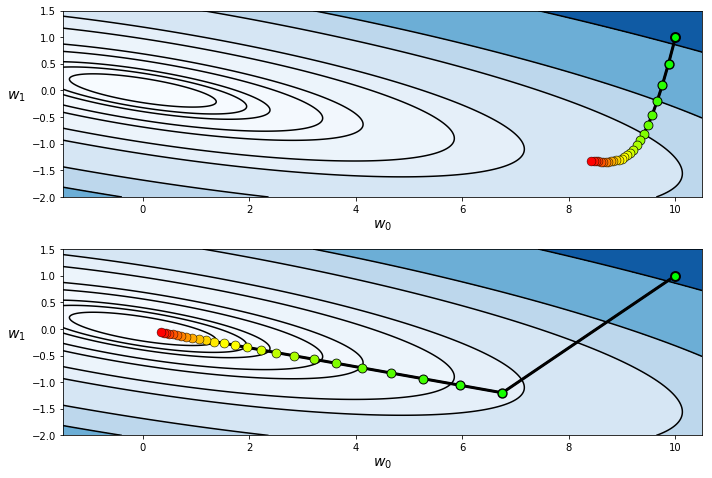

In [56]:
w = np.array([10.0,1.0]); max_its = 25; alpha = 10**(-2);
version = 'none'
weight_history_1,cost_history_1 = newtons_subsampled(g,alpha,max_its,w,version)

alpha = 10**(0);
version = 'component'
weight_history_2,cost_history_2 = newtons_subsampled(g,alpha,max_its,w,version)

# show run in both three-dimensions and just the input space via the contour plot
histories = [weight_history_1,weight_history_2]
gs = [g,g]
static_plotter.two_input_contour_vert_plots(gs,histories,num_contours = 25,xmin = -1.5,xmax = 10.5,ymin = -2.0,ymax = 1.5)

# Exercise 4.10. The Broyden–Fletcher–Goldfarb–Shanno (BFGS) method

While the update in the previous example was for the inverse matrix $\mathbf{F}^{k} = \left(\mathbf{S}^{k}\right)^{-1}$, an entirely similar recursive expression can be formulated for $\mathbf{S}^k$ itself.  Starting with the same assumption (i.e., a recursion based on a rank-2 difference between $\mathbf{S}^k$ and its predecessor) and employing
the corresponding secant condition, we can derive an analogous recursive update for $\mathbf{S}^k$ as

\begin{equation}
\mathbf{S}^{k} = \mathbf{S}^{k-1} + \frac{\mathbf{b}^k 
\left(\mathbf{b}^k\right)^T}{\left(\mathbf{a}^k\right)^T\mathbf{b}^k } -   \frac{\left(\mathbf{S}^{k-1}\mathbf{a}^k\right)\left(\mathbf{S}^{k-1}\mathbf{a}^k\right)^T}{\left(\mathbf{a}^k\right)^T\mathbf{S}^{k-1}\mathbf{a}^k}.
\end{equation}

This formula is often referred to as the
Broyden--Fletcher--Goldfarb--Shanno (BFGS) update, named after its original authors.

While this is a completely valid formula for $\mathbf{S}^k$, in order to compute
a secant-based Quasi-Newton descent step we would like to use its inverse $\mathbf{F}^k = \left(\mathbf{S}^{k}\right)^{-1}$.  Using the Sherman-Morrison identity we can write 

\begin{equation}
\begin{array}
\
\mathbf{F}^{k} = \left(\mathbf{S}^{k-1} + \frac{\mathbf{b}^k 
\left(\mathbf{b}^k\right)^T}{\left(\mathbf{a}^k\right)^T\mathbf{b}^k } -   \frac{\left(\mathbf{S}^{k-1}\mathbf{a}^k\right)\left(\mathbf{S}^{k-1}\mathbf{a}^k\right)^T}{\left(\mathbf{a}^k\right)^T\mathbf{S}^{k-1}\mathbf{a}^k} \right)^{-1}  \\
= \mathbf{F}^{k-1} + \frac{\left( \left(\mathbf{a}^k\right)^T\mathbf{b}^k +  
\left(\mathbf{b}^k\right)^T\mathbf{F}^{k-1}\mathbf{b}^k\right) \mathbf{a}^k\left(\mathbf{a}^k\right)^T}{\left(\left(\mathbf{a}^k\right)^T\mathbf{b}^k \right)^2} -   \frac{\mathbf{F}^{k-1}\mathbf{b}^k\left(\mathbf{a}^{k}\right)^T + \mathbf{a}^{k}\left(\mathbf{b}^k\right)^T\mathbf{F}^{k-1} }{\left(\mathbf{a}^k\right)^T\mathbf{b}^k}
\end{array}
\end{equation}

This BFGS formula for the inverse secant tends to work better in practice than the DFP version, and thus is more commonly used.